In [1]:
import numpy as np
import pandas as pd 
from tqdm import tqdm
import tensorflow as tf
from keras.models import Sequential
from keras.layers.recurrent import LSTM, GRU,SimpleRNN
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.embeddings import Embedding

### Read the concatenated twitter text


1.   tokenize the provided text
2.   fit_on_text -> text seqence -> padding them



In [28]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [29]:
df_train = pd.read_csv('/content/drive/MyDrive/NLP_task1/train.csv')
df_dev = pd.read_csv('/content/drive/MyDrive/NLP_task1/dev.csv')
df_test = pd.read_csv('/content/drive/MyDrive/NLP_task1/test.csv')

In [30]:
df_train.isnull().any()

Unnamed: 0      False
Unnamed: 0.1    False
label           False
text            False
dtype: bool

In [31]:
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline

In [32]:
def f1_score(predicts,target):
  return metrics.f1_score(target,predicts)


In [33]:
df_train

,Unnamed: 0,Unnamed: 0.1,label,text
0,0,0,0.0,4. can eating garlic help prevent infection wi...
1,1,1,1.0,french police chief killed himself after atta...
2,2,2,0.0,coronavirus disease (covid-19) advice for the ...
3,3,3,0.0,ottawa police confirm that there were multiple...
4,4,4,0.0,if the primary focus of a government isn't to ...
...,...,...,...,...
1558,1559,1558,0.0,4. it cannot be transmitted through goods manu...
1559,1560,1559,1.0,desperate ted cruz claims planned parenthood s...
1560,1561,1560,1.0,"""thoughts and prayers are not enough."" pres. o..."
1561,1562,1561,0.0,police have surrounded this building where the...


In [34]:
df_train

,Unnamed: 0,Unnamed: 0.1,label,text
0,0,0,0.0,4. can eating garlic help prevent infection wi...
1,1,1,1.0,french police chief killed himself after atta...
2,2,2,0.0,coronavirus disease (covid-19) advice for the ...
3,3,3,0.0,ottawa police confirm that there were multiple...
4,4,4,0.0,if the primary focus of a government isn't to ...
...,...,...,...,...
1558,1559,1558,0.0,4. it cannot be transmitted through goods manu...
1559,1560,1559,1.0,desperate ted cruz claims planned parenthood s...
1560,1561,1560,1.0,"""thoughts and prayers are not enough."" pres. o..."
1561,1562,1561,0.0,police have surrounded this building where the...


In [35]:
df_train['text'].apply(lambda x:len(str(x).split())).max()

2618

In [36]:
MAX_LENGTH = 2700

In [37]:
from keras.preprocessing import sequence, text

In [38]:
token = text.Tokenizer(num_words=None)

In [39]:
train = df_train.text.values
dev = df_dev.text.values
test = df_test.text.values

In [40]:
train_label = df_train.label.values
dev_label = df_dev.label.values

In [41]:
len(dev_label)

536

In [42]:
train_label

array([0., 1., 0., ..., 1., 0., 0.])

In [43]:
len(train)

1563

In [44]:
token.fit_on_texts(list(train) + list(dev))

In [45]:
seq_train = token.texts_to_sequences(train)
seq_dev = token.texts_to_sequences(dev)
seq_test = token.texts_to_sequences(test)


In [46]:
pad_train = sequence.pad_sequences(seq_train,maxlen = MAX_LENGTH )
pad_dev = sequence.pad_sequences(seq_dev,maxlen = MAX_LENGTH)
pad_test = sequence.pad_sequences(seq_test,maxlen = MAX_LENGTH)

index_word = token.word_index

In [47]:
pad_train

array([[    0,     0,     0, ...,    80,    20,    19],
       [    0,     0,     0, ...,   216,    52,   113],
       [    0,     0,     0, ...,  1514,  3173, 11157],
       ...,
       [    0,     0,     0, ...,  1919,     6,  2292],
       [    0,     0,     0, ...,   460, 21800,  1047],
       [    0,     0,     0, ...,  4045,    46,  1504]], dtype=int32)

In [48]:
len(index_word)

25355

In [49]:
def roc_auc(predicts,target):
  fpr, tpr,threshold = metrics.roc_curve(target,predicts)
  return metrics.auc(fpr,tpr)

### RNN

In [52]:
# %%time
rnn_model = Sequential()
rnn_model.add(Embedding(len(index_word) + 1,300,input_length=MAX_LENGTH))
rnn_model.add(SimpleRNN(100))
rnn_model.add(Dense(1, activation='sigmoid'))
rnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])    
rnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 2700, 300)         7606800   
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 100)               40100     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 7,647,001
Trainable params: 7,647,001
Non-trainable params: 0
_________________________________________________________________


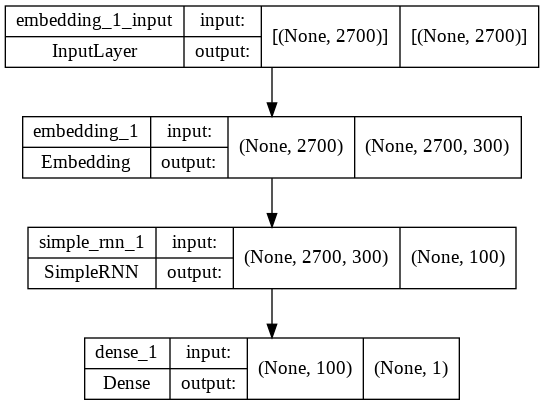

In [53]:

tf.keras.utils.plot_model(rnn_model, to_file="rnn_model.png", show_shapes=True)

In [ ]:
cnn_model

In [ ]:
cnn_model.fit(pad_train, train_label, epochs=10, batch_size= 128)

Epoch 1/10
13/13 [==============================] - 30s 2s/step - loss: 0.5814 - accuracy: 0.7063
Epoch 2/10
13/13 [==============================] - 29s 2s/step - loss: 0.4055 - accuracy: 0.8183
Epoch 3/10
13/13 [==============================] - 29s 2s/step - loss: 0.2698 - accuracy: 0.9232
Epoch 4/10
13/13 [==============================] - 29s 2s/step - loss: 0.1462 - accuracy: 0.9750
Epoch 5/10
13/13 [==============================] - 29s 2s/step - loss: 0.0560 - accuracy: 0.9987
Epoch 6/10
13/13 [==============================] - 29s 2s/step - loss: 0.0259 - accuracy: 0.9994
Epoch 7/10
13/13 [==============================] - 29s 2s/step - loss: 0.0146 - accuracy: 1.0000
Epoch 8/10
13/13 [==============================] - 29s 2s/step - loss: 0.0098 - accuracy: 1.0000
Epoch 9/10
13/13 [==============================] - 29s 2s/step - loss: 0.0073 - accuracy: 1.0000
Epoch 10/10
13/13 [==============================] - 29s 2s/step - loss: 0.0058 - accuracy: 1.0000


In [ ]:


scores = cnn_model.predict(pad_dev)
print("Auc:",(roc_auc(scores,dev_label)))
predictions = (scores > 0.5).astype("int32")
print(metrics.classification_report(dev_label, predictions))

Auc: 0.6448208199938035
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       421
           1       0.33      0.31      0.32       115

    accuracy                           0.71       536
   macro avg       0.57      0.57      0.57       536
weighted avg       0.71      0.71      0.71       536



In [ ]:
print('kaggle score',0.41904)

kaggle score 0.41904


In [ ]:
scores = cnn_model.predict(pad_test)
predictions = (scores > 0.5).astype("int32")
df_result = pd.DataFrame (predictions, columns = ['predicted'])
df_result['Id'] = range(0,len(df_result))
df_result.to_csv('prediction.csv',index = False)

### LSTM

In [54]:
lstm_model = Sequential()
lstm_model.add(Embedding(len(index_word) + 1,300,input_length=MAX_LENGTH))
lstm_model.add(LSTM(100, dropout=0.3, recurrent_dropout=0.3))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
  
lstm_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 2700, 300)         7606800   
                                                                 
 lstm (LSTM)                 (None, 100)               160400    
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 7,767,301
Trainable params: 7,767,301
Non-trainable params: 0
_________________________________________________________________


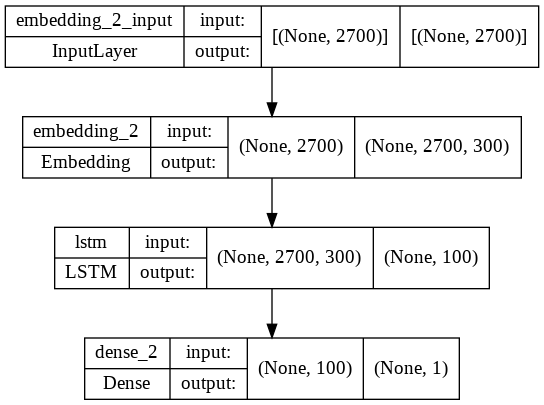

In [55]:
tf.keras.utils.plot_model(lstm_model, to_file="lstm_model.png", show_shapes=True)

In [ ]:
lstm_model.fit(pad_train, train_label, epochs=10, batch_size= 128)

Epoch 1/10
13/13 [==============================] - 155s 11s/step - loss: 0.6181 - accuracy: 0.7646
Epoch 2/10
13/13 [==============================] - 150s 11s/step - loss: 0.4528 - accuracy: 0.7972
Epoch 3/10
13/13 [==============================] - 153s 12s/step - loss: 0.3314 - accuracy: 0.8221
Epoch 4/10
13/13 [==============================] - 154s 12s/step - loss: 0.1716 - accuracy: 0.9360
Epoch 5/10
13/13 [==============================] - 143s 11s/step - loss: 0.0674 - accuracy: 0.9878
Epoch 6/10
13/13 [==============================] - 139s 11s/step - loss: 0.0298 - accuracy: 0.9936
Epoch 7/10
13/13 [==============================] - 147s 11s/step - loss: 0.0174 - accuracy: 0.9987
Epoch 8/10
13/13 [==============================] - 145s 11s/step - loss: 0.0045 - accuracy: 1.0000
Epoch 9/10
13/13 [==============================] - 147s 11s/step - loss: 0.0025 - accuracy: 1.0000
Epoch 10/10
13/13 [==============================] - 146s 11s/step - loss: 0.0021 - accuracy: 1.0000

In [ ]:
scores = lstm_model.predict(pad_dev)
print("Auc:",(roc_auc(scores,dev_label)))
predictions = (scores > 0.5).astype("int32")
print(metrics.classification_report(dev_label, predictions))

Auc: 0.9375813281007952
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       421
           1       0.81      0.72      0.76       115

    accuracy                           0.90       536
   macro avg       0.87      0.84      0.85       536
weighted avg       0.90      0.90      0.90       536



In [ ]:
scores = lstm_model.predict(pad_test)
predictions = (scores > 0.5).astype("int32")
df_result = pd.DataFrame (predictions, columns = ['predicted'])
df_result['Id'] = range(0,len(df_result))
df_result.to_csv('prediction_lstm.csv',index = False)

In [ ]:
print('kaggle score', 0.72527)

kaggle score 0.6666


### GRU

In [56]:
from keras.layers import SpatialDropout1D

In [57]:
GRU_model = Sequential()
GRU_model.add(Embedding(len(index_word) + 1,300,input_length=MAX_LENGTH))
GRU_model.add(SpatialDropout1D(0.3))
GRU_model.add(GRU(100))
GRU_model.add(Dense(1, activation='sigmoid'))
GRU_model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
  
GRU_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 2700, 300)         7606800   
                                                                 
 spatial_dropout1d (SpatialD  (None, 2700, 300)        0         
 ropout1D)                                                       
                                                                 
 gru (GRU)                   (None, 100)               120300    
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 7,727,201
Trainable params: 7,727,201
Non-trainable params: 0
_________________________________________________________________


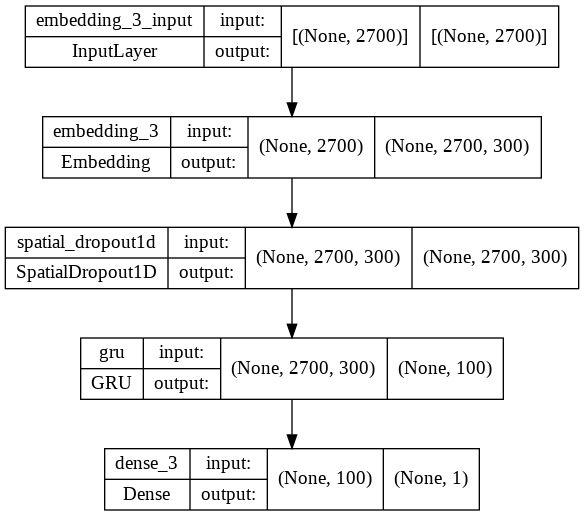

In [58]:
tf.keras.utils.plot_model(GRU_model, to_file="GRU_model.png", show_shapes=True)

In [ ]:
GRU_model.fit(pad_train, train_label, epochs=10, batch_size= 128)

Epoch 1/10
13/13 [==============================] - 96s 7s/step - loss: 0.6396 - accuracy: 0.7582
Epoch 2/10
13/13 [==============================] - 93s 7s/step - loss: 0.4431 - accuracy: 0.7965
Epoch 3/10
13/13 [==============================] - 90s 7s/step - loss: 0.3260 - accuracy: 0.8317
Epoch 4/10
13/13 [==============================] - 89s 7s/step - loss: 0.1669 - accuracy: 0.9200
Epoch 5/10
13/13 [==============================] - 91s 7s/step - loss: 0.0554 - accuracy: 0.9904
Epoch 6/10
13/13 [==============================] - 92s 7s/step - loss: 0.0134 - accuracy: 0.9974
Epoch 7/10
13/13 [==============================] - 93s 7s/step - loss: 0.0061 - accuracy: 0.9987
Epoch 8/10
13/13 [==============================] - 93s 7s/step - loss: 0.0040 - accuracy: 0.9994
Epoch 9/10
13/13 [==============================] - 88s 7s/step - loss: 0.0015 - accuracy: 1.0000
Epoch 10/10
13/13 [==============================] - 89s 7s/step - loss: 6.3381e-04 - accuracy: 1.0000


In [ ]:
scores = GRU_model.predict(pad_dev)
print("Auc:",(roc_auc(scores,dev_label)))
predictions = (scores > 0.5).astype("int32")
print(metrics.classification_report(dev_label, predictions))

Auc: 0.9144893111638954
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       421
           1       0.77      0.58      0.66       115

    accuracy                           0.87       536
   macro avg       0.83      0.77      0.79       536
weighted avg       0.87      0.87      0.87       536



In [ ]:
print("Kaggle Score",0.70329)

Kaggle Score 0.70329


In [ ]:
scores = GRU_model.predict(pad_test)
predictions = (scores > 0.5).astype("int32")
df_result = pd.DataFrame (predictions, columns = ['predicted'])
df_result['Id'] = range(0,len(df_result))
df_result.to_csv('prediction_gru.csv',index = False)

### Bi-directional LSTM

In [59]:
from keras.layers import Bidirectional

In [60]:
blstm_model = Sequential()
blstm_model.add(Embedding(len(index_word) + 1,300,input_length=MAX_LENGTH))
blstm_model.add(Bidirectional(LSTM(150, dropout=0.3, recurrent_dropout=0.3)))
blstm_model.add(Dense(1, activation='sigmoid'))
blstm_model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
  
blstm_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 2700, 300)         7606800   
                                                                 
 bidirectional (Bidirectiona  (None, 300)              541200    
 l)                                                              
                                                                 
 dense_4 (Dense)             (None, 1)                 301       
                                                                 
Total params: 8,148,301
Trainable params: 8,148,301
Non-trainable params: 0
_________________________________________________________________


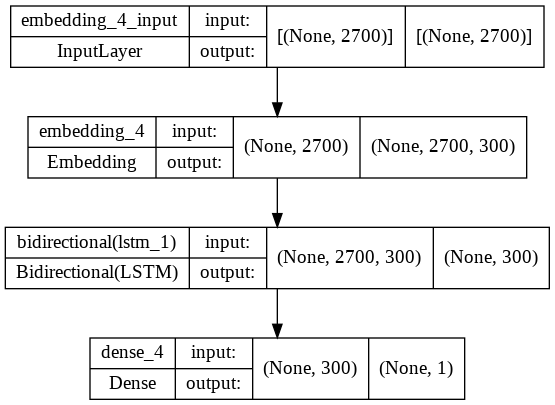

In [61]:
tf.keras.utils.plot_model(blstm_model, to_file="blstm_model.png", show_shapes=True)

In [ ]:
blstm_model.fit(pad_train, train_label, epochs=12, batch_size= 128)

Epoch 1/12
13/13 [==============================] - 373s 28s/step - loss: 0.5570 - accuracy: 0.7505
Epoch 2/12
13/13 [==============================] - 370s 28s/step - loss: 0.4136 - accuracy: 0.7965
Epoch 3/12
13/13 [==============================] - 374s 29s/step - loss: 0.2477 - accuracy: 0.9143
Epoch 4/12
13/13 [==============================] - 386s 30s/step - loss: 0.1248 - accuracy: 0.9763
Epoch 5/12
13/13 [==============================] - 407s 31s/step - loss: 0.0485 - accuracy: 0.9910
Epoch 6/12
13/13 [==============================] - 411s 32s/step - loss: 0.0202 - accuracy: 0.9968
Epoch 7/12
13/13 [==============================] - 404s 31s/step - loss: 0.0127 - accuracy: 1.0000
Epoch 8/12
13/13 [==============================] - 405s 31s/step - loss: 0.0053 - accuracy: 0.9994
Epoch 9/12
13/13 [==============================] - 397s 30s/step - loss: 0.0060 - accuracy: 1.0000
Epoch 10/12
13/13 [==============================] - 395s 30s/step - loss: 0.0046 - accuracy: 0.9994

In [ ]:
scores = blstm_model.predict(pad_dev)
print("Auc:",(roc_auc(scores,dev_label)))
predictions = (scores > 0.5).astype("int32")
print(metrics.classification_report(dev_label, predictions))

Auc: 0.9605494165031498
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       421
           1       0.78      0.85      0.81       115

    accuracy                           0.92       536
   macro avg       0.87      0.89      0.88       536
weighted avg       0.92      0.92      0.92       536



In [ ]:
scores = blstm_model.predict(pad_test)
predictions = (scores > 0.5).astype("int32")
df_result = pd.DataFrame (predictions, columns = ['predicted'])
df_result['Id'] = range(0,len(df_result))
df_result.to_csv('prediction_blstm.csv',index = False)

In [ ]:
print("Kaggle Score",0.74000)

Kaggle Score 0.74
